 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Settings</p>

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import data files</p>

In [325]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [326]:
train = train.sample(50000)

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">I.DATA PREPARATION</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.EDA ( Exploratory Data Analysis)</p>

#### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A1.Reading Data</p>

In [168]:
train.tail()

id class  cap-diameter cap-shape cap-surface cap-color  \
928692    928692     p          0.72         x           g         y   
1402328  1402328     p          5.16         x           e         e   
65493      65493     p          4.55         x           t         n   
1309610  1309610     e         20.69         f           s         k   
1357108  1357108     e          6.45         x           y         n   

        does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
928692                     f             NaN          NaN          y   
1402328                    f               a          NaN          w   
65493                      f               s            c          n   
1309610                    f               a            d          y   
1357108                    f               u            c          w   

         stem-height  stem-width stem-root stem-surface stem-color veil-type  \
928692          3.67        0.78       NaN          NaN          y       NaN   
1402328         6.96        8.80       NaN          NaN          e       NaN   
65493           6.07        8.83       NaN          NaN          n       NaN   
1309610         8.55       28.25       NaN          NaN          w       NaN   
1357108         6.02       10.37       NaN            y          n       NaN   

        veil-color has-ring ring-type spore-print-color habitat season  
928692         NaN        f         f               NaN       d      a  
1402328          w        t         z               NaN       d      a  
65493            n        t         z               NaN       d      w  
1309610        NaN        f         f                 w       d      u  
1357108        NaN        f         f               NaN       d      a

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A2.Data Size</p>

In [169]:
train.shape

(100000, 22)

In [7]:
print(f'{train.memory_usage().sum()/(1000000)} MB')

1.84 MB


 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A3.Data Types</p>

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 340034 to 2213362
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   class                 10000 non-null  object 
 2   cap-diameter          10000 non-null  float64
 3   cap-shape             10000 non-null  object 
 4   cap-surface           7812 non-null   object 
 5   cap-color             10000 non-null  object 
 6   does-bruise-or-bleed  10000 non-null  object 
 7   gill-attachment       8326 non-null   object 
 8   gill-spacing          6013 non-null   object 
 9   gill-color            10000 non-null  object 
 10  stem-height           10000 non-null  float64
 11  stem-width            10000 non-null  float64
 12  stem-root             1124 non-null   object 
 13  stem-surface          3695 non-null   object 
 14  stem-color            10000 non-null  object 
 15  veil-type        

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A4.Summary Statistics</p>

In [9]:
train.describe()

id  cap-diameter   stem-height    stem-width
count  1.000000e+04  10000.000000  10000.000000  10000.000000
mean   1.577608e+06      6.345169      6.355007     11.193609
std    9.004349e+05      4.732285      2.667974      8.118286
min    4.320000e+02      0.440000      1.230000      0.570000
25%    7.988550e+05      3.330000      4.680000      5.027500
50%    1.593872e+06      5.770000      5.880000      9.620000
75%    2.353571e+06      8.270000      7.410000     15.650000
max    3.116777e+06     54.950000     25.860000     75.700000

In [10]:
train['class'].unique()

array(['p', 'e'], dtype=object)

In [11]:
# value count of target classes
classes = train['class'].value_counts()
classes.reset_index()

class  count
0     p   5483
1     e   4517

<Axes: xlabel='class', ylabel='count'>

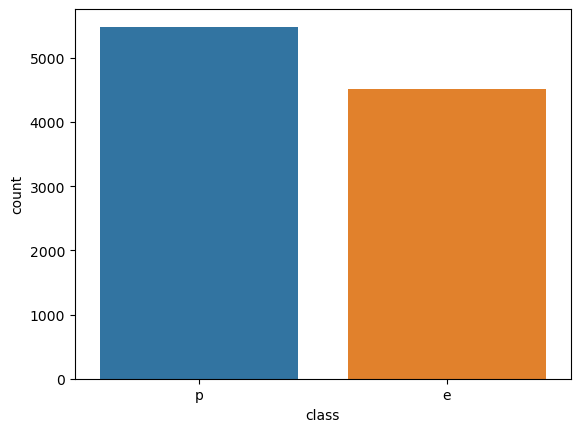

In [12]:
sns.countplot(x='class',data=train)

In [13]:
# donut plot visualization of target class : e - edible , p - poisonous
fig = go.Figure(data=[go.Pie(labels=['Poisonous','Edible'], values=classes.values,hole = .4,marker = dict(colors = ['red','green']))])
fig.update_layout(title_text='Classes of Mushroom')
fig.show()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem">Correlation Matrics</p> 

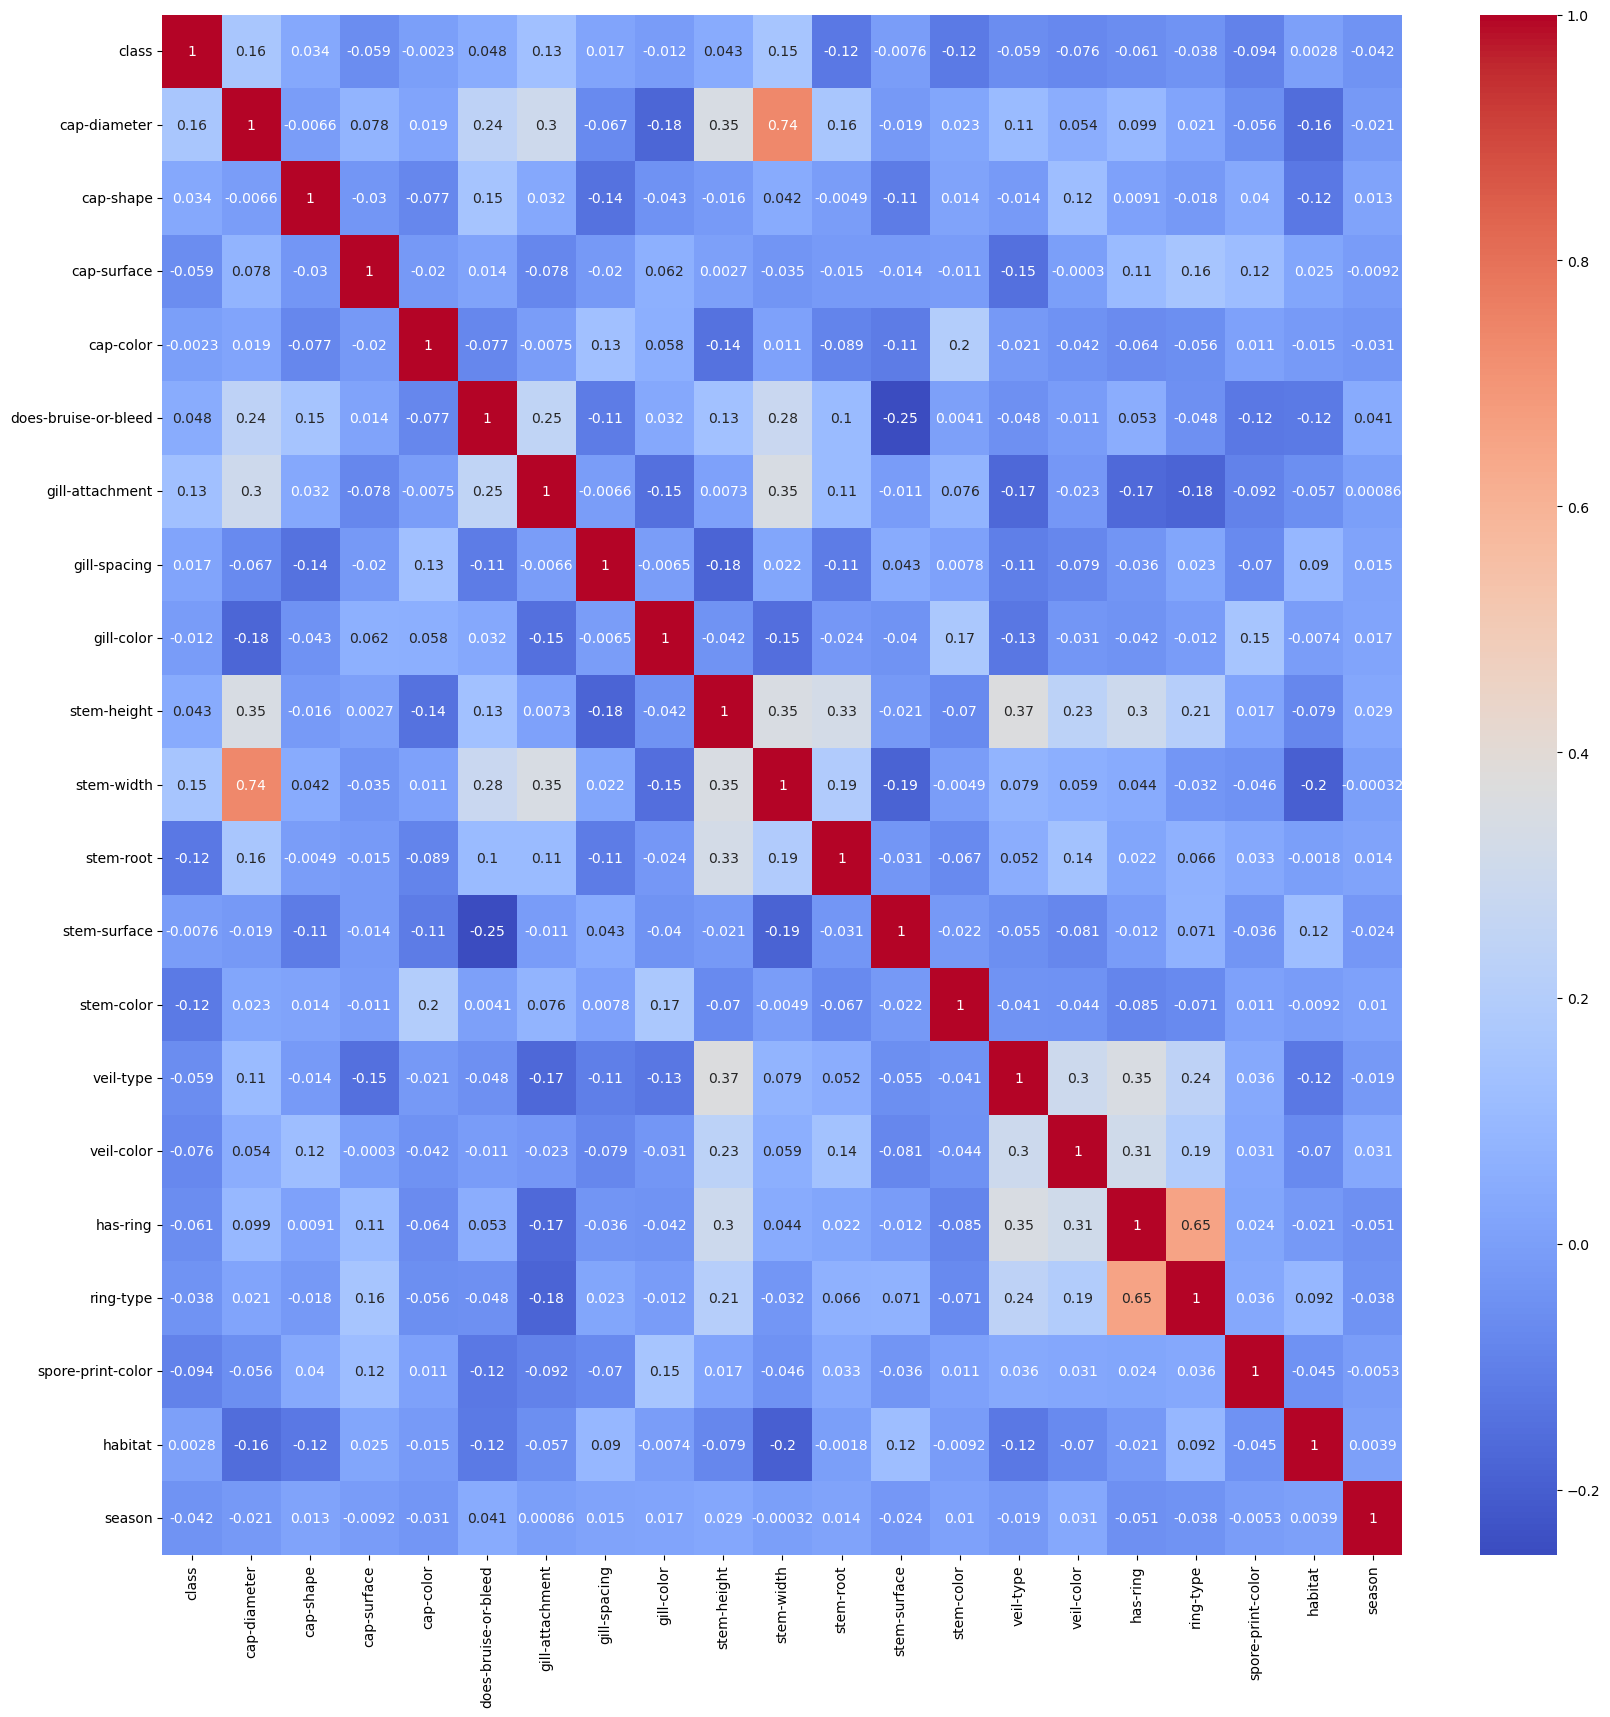

In [14]:
plt.figure(figsize=(20,20))
temp=train.dropna()
temp=train.drop('id',axis=1)
temp=temp.apply(lambda x : pd.factorize(x)[0] if x.dtype=='object'else x)
sns.heatmap(temp.corr(),annot=True,cmap='coolwarm')
plt.show()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B.Data Pre-processing</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B1.Missing Values</p>

In [327]:
# standardizing the Missing Data with null values to make it easier to handle
train= train.fillna(np.nan)
test = test.fillna(np.nan)

In [328]:
train.isnull().sum().sort_values(ascending=False)

veil-type               47469
spore-print-color       45696
stem-root               44224
veil-color              44026
stem-surface            31691
gill-spacing            20042
cap-surface             10767
gill-attachment          8389
ring-type                2052
gill-color                  2
does-bruise-or-bleed        1
id                          0
habitat                     0
has-ring                    0
stem-width                  0
stem-color                  0
class                       0
stem-height                 0
cap-color                   0
cap-shape                   0
cap-diameter                0
season                      0
dtype: int64

In [329]:
def null_percent(df):
    per=((df.isnull().sum()/len(df))*100).round(5)
    per.sort_values(ascending=False,inplace =True)
    return per
print("Nan Values in train data:")
print(null_percent(train))

print("Nan Values in test data:")
print(null_percent(test))

Nan Values in train data:
veil-type               94.938
spore-print-color       91.392
stem-root               88.448
veil-color              88.052
stem-surface            63.382
gill-spacing            40.084
cap-surface             21.534
gill-attachment         16.778
ring-type                4.104
gill-color               0.004
does-bruise-or-bleed     0.002
id                       0.000
habitat                  0.000
has-ring                 0.000
stem-width               0.000
stem-color               0.000
class                    0.000
stem-height              0.000
cap-color                0.000
cap-shape                0.000
cap-diameter             0.000
season                   0.000
dtype: float64
Nan Values in test data:
veil-type               94.87869
spore-print-color       91.41722
stem-root               88.45254
veil-color              87.88044
stem-surface            63.59533
gill-spacing            40.40469
cap-surface             21.50682
gill-attachment      

In [330]:
Missing = train.isna().mean()*100 # percentage of missing columns
High_missing_columns = Missing[Missing>85]
High_missing_columns.reset_index() 
High_missing_columns.sort_values(ascending=False,inplace =True)
High_missing_columns

veil-type            94.938
spore-print-color    91.392
stem-root            88.448
veil-color           88.052
dtype: float64

In [331]:
colums_to_drop = train.columns[Missing>85]
colums_to_drop

Index(['stem-root', 'veil-type', 'veil-color', 'spore-print-color'], dtype='object')

In [332]:
train= train.drop(columns = colums_to_drop) 
test = test.drop(columns = colums_to_drop)

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B2.Filling Nulls</p>

In [333]:
numerical_cols = train.select_dtypes(exclude=['object', 'category'])
numerical_cols.columns

Index(['id', 'cap-diameter', 'stem-height', 'stem-width'], dtype='object')

In [334]:
categorical_cols = train.select_dtypes(include=['object', 'category'])
categorical_cols.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-surface', 'stem-color', 'has-ring', 'ring-type', 'habitat',
       'season'],
      dtype='object')

In [335]:
def fill_empty_categorical(df):
    for i in categorical_cols:
        df[i].fillna(df[i].mode()[0], inplace=True)
    return df

def fill_empty_numerical(df):
    for i in numerical_cols:
        df[i].fillna(df[i].median(), inplace=True)  
    return df

train = fill_empty_categorical(train)
train = fill_empty_numerical(train)

test = fill_empty_categorical(test)
test = fill_empty_numerical(test)

KeyError: 'class'

#### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B3.Remove Duplicates and Unnecessary Columns</p>

In [336]:
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

In [337]:
print("There are {} duplicates in train dataset.".format(train.duplicated().sum()))
print("There are {} duplicates in test dataset.".format(test.duplicated().sum()))

There are 0 duplicates in train dataset.
There are 85 duplicates in test dataset.


In [338]:
test.loc[test.duplicated()].sort_values('cap-diameter')

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
1967686          0.58         f         NaN         o                    f   
1490756          0.61         x         NaN         o                    f   
1258549          0.66         x         NaN         o                    f   
1987178          0.68         f         NaN         o                    f   
1976401          0.68         f         NaN         o                    f   
1857955          0.68         x         NaN         o                    f   
1279870          0.69         x         NaN         o                    f   
922453           0.70         x         NaN         o                    f   
1361032          0.71         f         NaN         o                    f   
1631140          0.73         x         NaN         o                    f   
2016264          0.74         x         NaN         o                    f   
1953731          0.81         f         NaN         o                    f   
1201070          0.82         f         NaN         o                    f   
1867746          0.83         f         NaN         o                    f   
1950273          1.37         x         NaN         n                    f   
1435396          1.39         x         NaN         n                    f   
1757905          1.49         x         NaN         n                    f   
1872041          1.51         x         NaN         n                    f   
1786285          1.53         x         NaN         n                    f   
1440154          1.59         x         NaN         n                    f   
975304           1.62         x         NaN         n                    f   
916971           1.66         x         NaN         n                    f   
1633062          1.81         f           i         l                    f   
1294532          1.86         x           i         l                    f   
1546952          2.19         b           s         y                    f   
1265722          2.33         x           i         k                    f   
1621240          2.46         f           i         l                    f   
924875           2.55         x           i         e                    f   
932368           2.95         b         NaN         n                    f   
354585           3.02         b           y         n                    f   
1274381          3.11         x           t         n                    f   
1545204          3.14         b           y         n                    f   
1987961          3.17         x           k         w                    f   
988260           3.27         x           i         e                    f   
574111           3.32         f           d         n                    f   
1254319          3.38         x           h         n                    f   
1850691          3.39         f           d         n                    f   
764906           3.40         f           h         n                    f   
1827450          3.40         b           y         n                    f   
1433053          3.44         x           h         n                    f   
654311           3.48         b           y         n                    f   
1340448          3.50         b           s         y                    f   
1889766          3.50         b           s         y                    f   
450522           3.69         b           s         y                    f   
1833337          3.73         f           d         n                    f   
1831309          3.82         x           s         y                    f   
812175           3.85         x           h         n                    f   
1426962          3.90         b           y         n                    f   
784987           4.59         x           s         y                    f   
1018062          5.01         x         NaN         y                    f   
697373           5.24         x

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B4.Convert Types (Downcasting)</p>

In [339]:
def convert_types (df):
    object_to_categorical = df.select_dtypes(include=['object'])
    numerical_int = df.select_dtypes(include=['int64'])
    numerical_float = df.select_dtypes(include=['float64'])
    
    for i in object_to_categorical:
         df[i] = df[i].astype('category')
    for i in numerical_int:
         df[i] = df[i].astype('int32')  
    for i in numerical_float:
         df[i] = df[i].astype('float32') 
    return df

train = convert_types(train)
test = convert_types(test)

In [340]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 2617607 to 1628254
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   class                 50000 non-null  category
 1   cap-diameter          50000 non-null  float32 
 2   cap-shape             50000 non-null  category
 3   cap-surface           50000 non-null  category
 4   cap-color             50000 non-null  category
 5   does-bruise-or-bleed  50000 non-null  category
 6   gill-attachment       50000 non-null  category
 7   gill-spacing          50000 non-null  category
 8   gill-color            50000 non-null  category
 9   stem-height           50000 non-null  float32 
 10  stem-width            50000 non-null  float32 
 11  stem-surface          50000 non-null  category
 12  stem-color            50000 non-null  category
 13  has-ring              50000 non-null  category
 14  ring-type             50000 non-null  category
 15 

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B5.Aggregate Categorical and Numerical</p>

In [341]:
# checking number of unique values in each column
print("Number of unique values in each column : \n")
for col in train.columns:
    print(f"{col} : {train[col].nunique()} unique values")

Number of unique values in each column : 

class : 2 unique values
cap-diameter : 2058 unique values
cap-shape : 15 unique values
cap-surface : 17 unique values
cap-color : 21 unique values
does-bruise-or-bleed : 3 unique values
gill-attachment : 13 unique values
gill-spacing : 5 unique values
gill-color : 17 unique values
stem-height : 1737 unique values
stem-width : 3585 unique values
stem-surface : 12 unique values
stem-color : 16 unique values
has-ring : 4 unique values
ring-type : 13 unique values
habitat : 15 unique values
season : 4 unique values


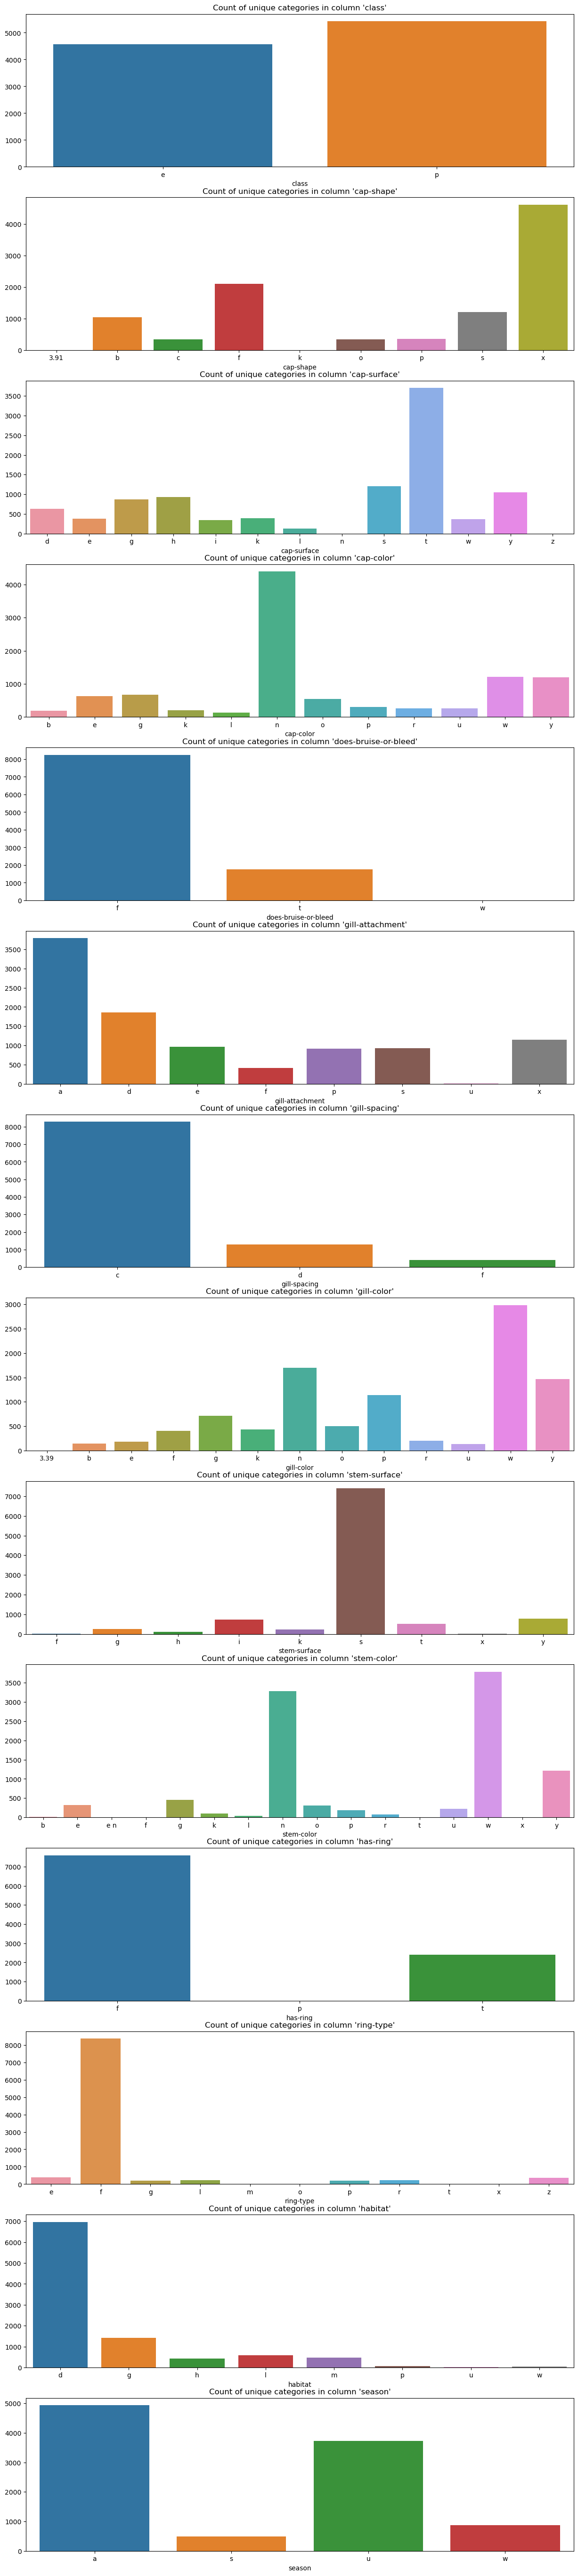

In [233]:
def count_cat(df):
    cat_col=df.select_dtypes(include=['category']).columns
    uni_col={col: df[col].value_counts() for col in cat_col}
    plt.figure(figsize=(15,len(cat_col)*5))
    for i ,(col,count) in enumerate(uni_col.items(),1):
        plt.subplot(len(cat_col),1,i)
        sns.barplot(x=count.index,y=count.values)
        plt.title(f"Count of unique categories in column '{col}'")
    plt.show()
count_cat(train)

In [137]:
categorical_columns_2 =train.select_dtypes(include = 'object').columns
numerical_columns_2 = train.select_dtypes(exclude = 'object').columns

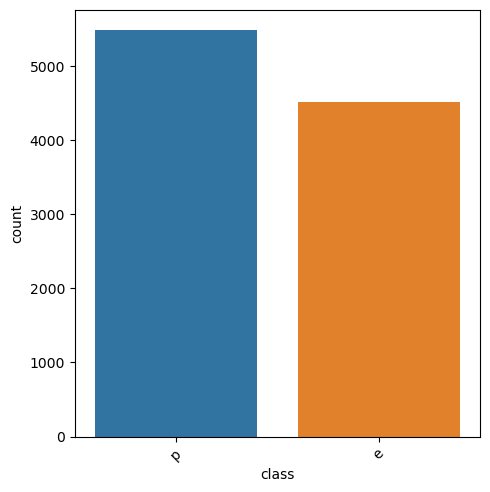

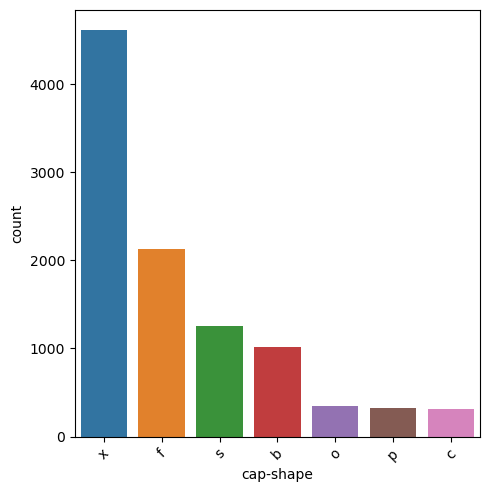

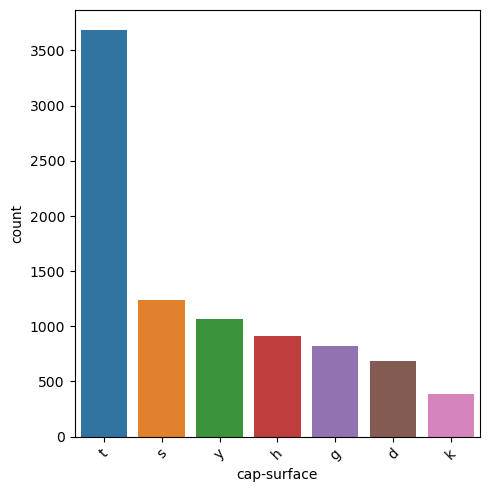

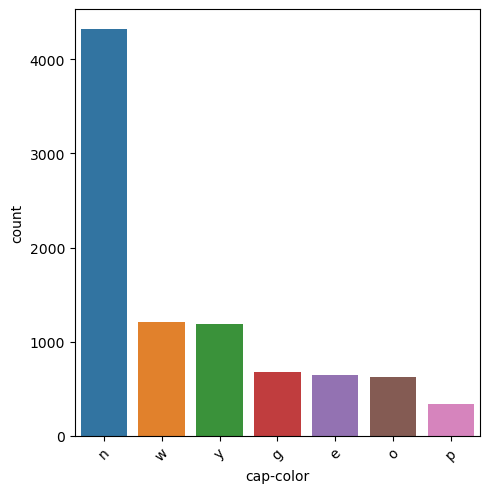

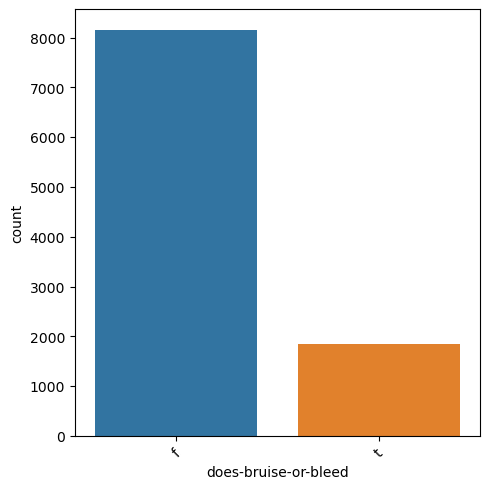

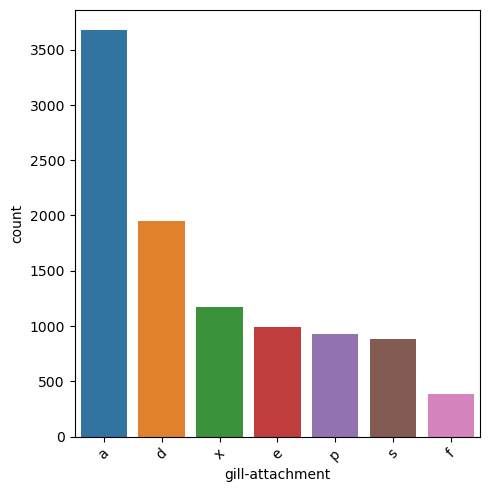

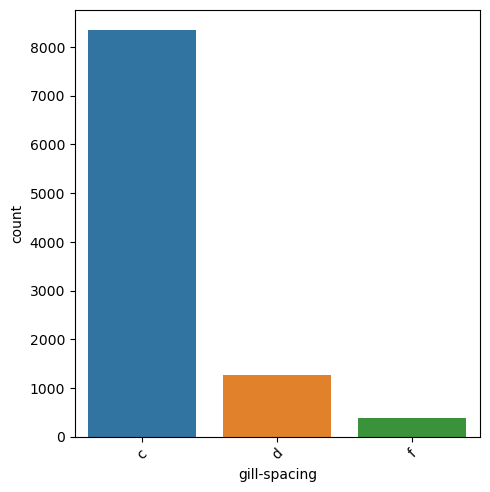

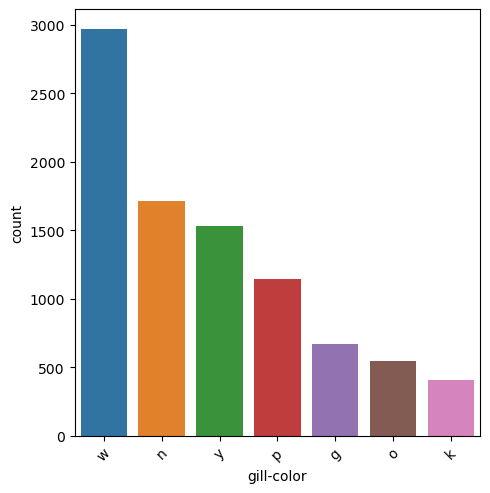

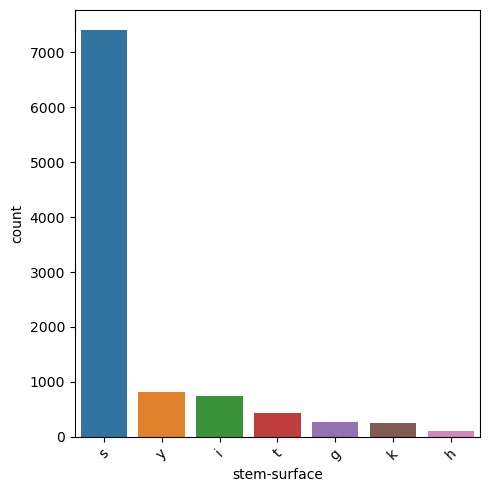

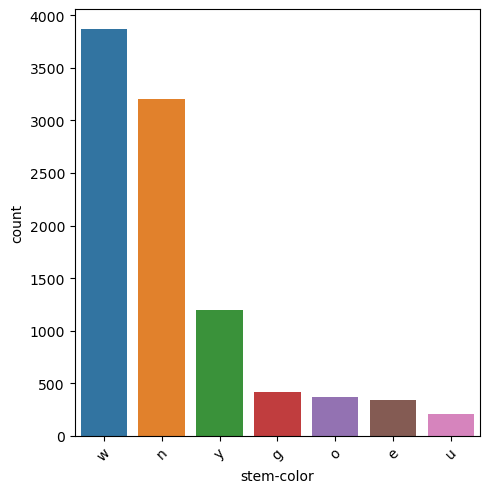

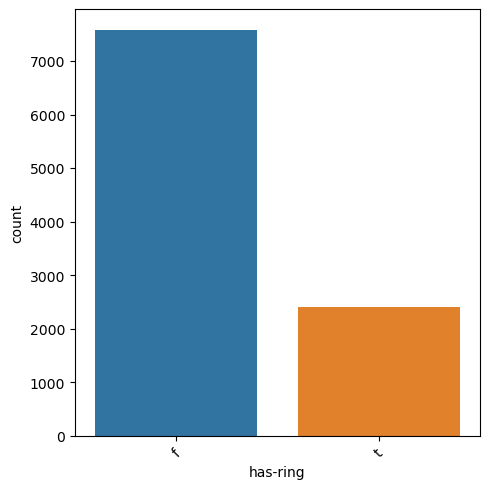

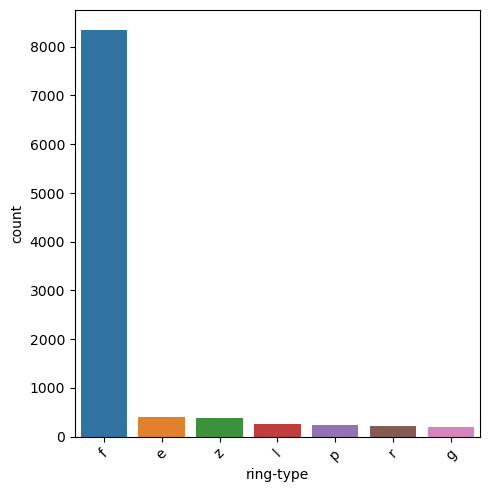

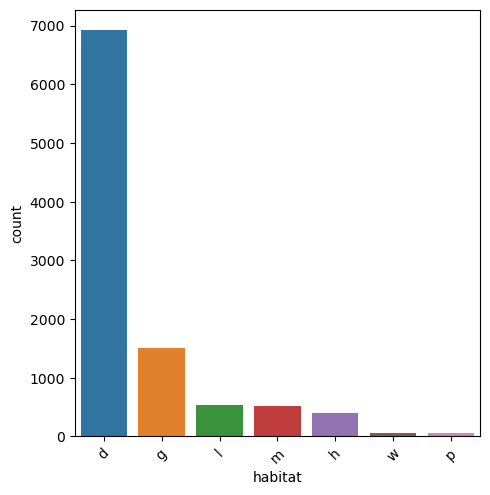

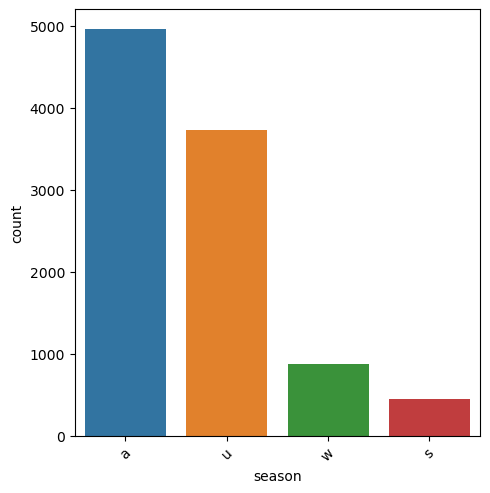

In [28]:
for col in categorical_columns_2:
    df = train[col].value_counts().reset_index()
    df.columns = [col, 'count']
    df = df.sort_values(by='count', ascending=False).head(7)
    
    plt.figure(figsize=(5,5))
    sns.barplot(data=df, x=col, y='count')
    plt.tight_layout()

    plt.xticks(rotation=45)
    plt.show()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C.Data Processing</p>

In [342]:
X = train.drop(columns=['class']).copy()
y = train['class']

In [343]:
from sklearn.preprocessing import LabelEncoder

In [344]:
label=LabelEncoder()
y=label.fit_transform(y)
y = y.astype('int16')
y

array([0, 1, 1, ..., 0, 1, 0], dtype=int16)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C1.Skewness of distributions</p>

In [345]:
numerical_columns = X.select_dtypes(include=['number']).columns
numerical_columns

Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')

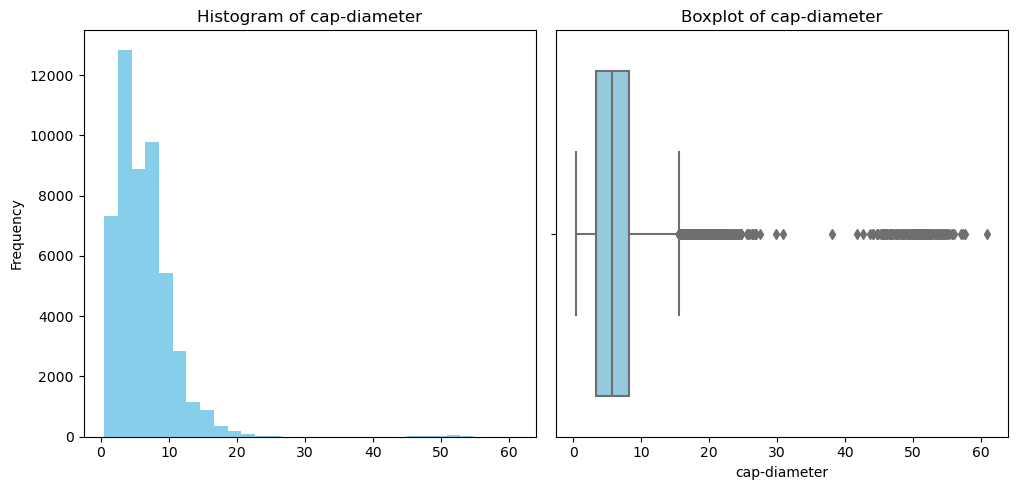

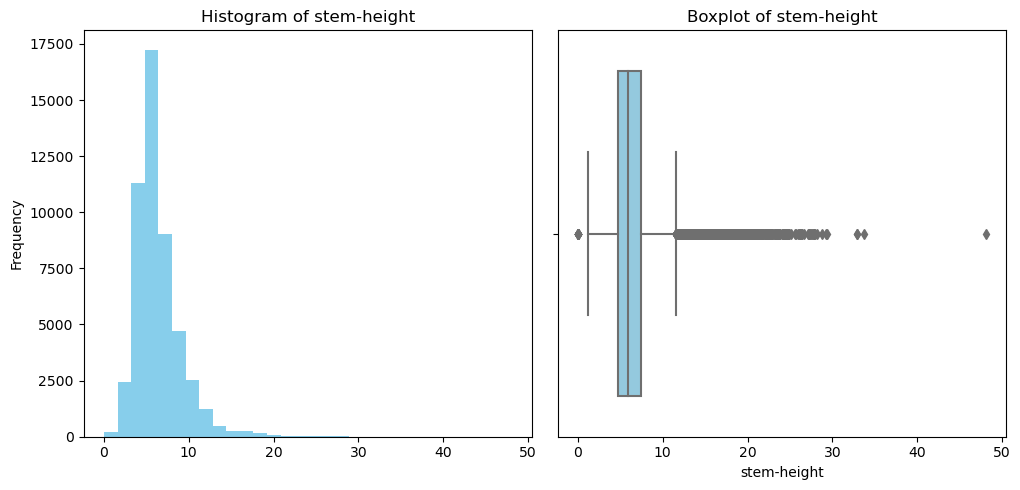

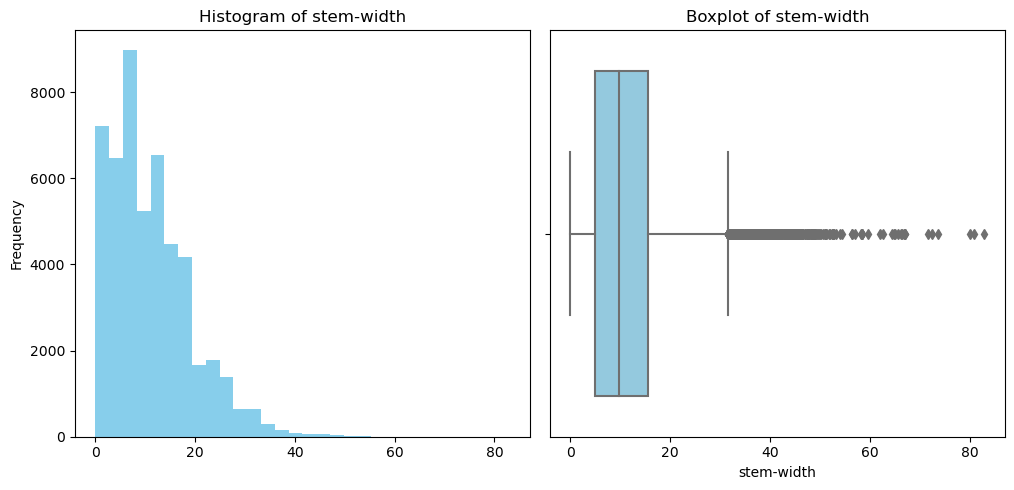

In [346]:
def plot_detect_outliers (columns=numerical_columns):
    for col in numerical_columns:
        plt.figure(figsize=(15, 5))

        # Histogram
        plt.subplot(1, 3, 1)
        X[col].plot.hist(bins=30, color='skyblue')
        plt.title(f'Histogram of {col}')

        # Boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=X[col],color='skyblue')
        plt.title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()
        
plot_detect_outliers (numerical_columns)

In [347]:
# Handle the Skeweness
from scipy.stats import boxcox

def apply_boxcox(df, columns):
    df_transformed = df.copy()
    
    for col in columns:
        # Ensure the data is strictly positive
        if (df[col] > 0).any():
            # Shift the data if there are zero or negative values
            shift = abs(df[col].min()) + 1
            df_transformed[col] = df[col] + shift
        else:
            shift = 0
        
        df_transformed[col], best_lambda = boxcox(df_transformed[col])
        
    return df_transformed

X = apply_boxcox(X,numerical_columns)
test = apply_boxcox(test,numerical_columns)

BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C2.Detect Outliers</p>

In [348]:
def calculate_outliers_percentage(df):

    outlier_counts = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    # Print the percentage of outliers for each column
    for column in outlier_counts:
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")

print("Train data:")
calculate_outliers_percentage(X)
print("Test data:")
calculate_outliers_percentage(test)

Train data:
Percentage of outliers in cap-diameter: 0.36%
Percentage of outliers in stem-height: 2.64%
Percentage of outliers in stem-width: 0.05%
Test data:
Percentage of outliers in cap-diameter: 2.47%
Percentage of outliers in stem-height: 4.25%
Percentage of outliers in stem-width: 2.15%


In [349]:
def handle_outliers(df):

    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    #clip: everything smaller than lower_bound = lower_bound / everything grater than upper_bound = upper_bound
    return df

X = handle_outliers(X)
test = handle_outliers(test)

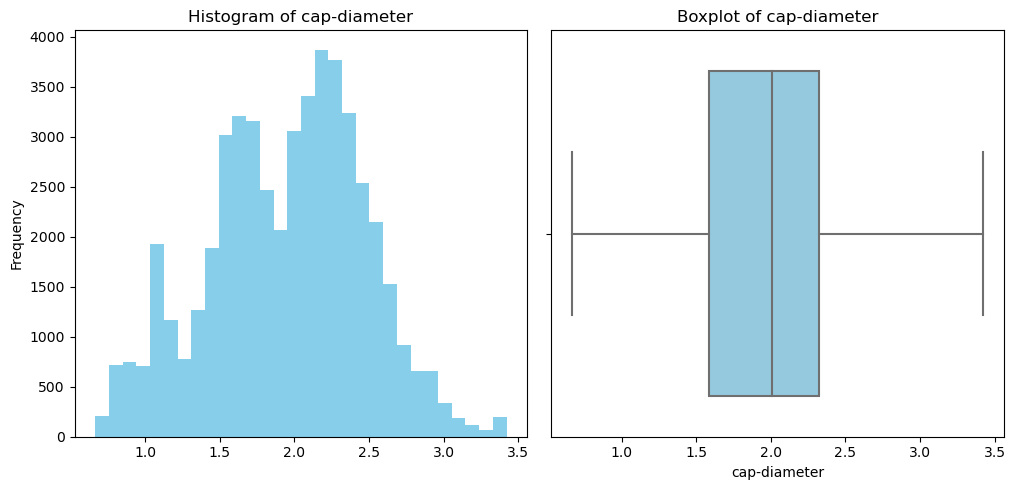

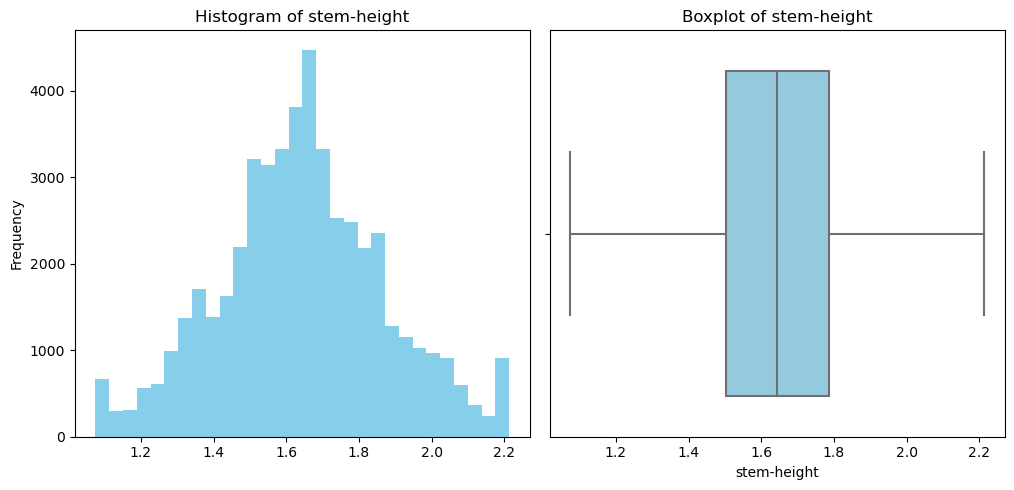

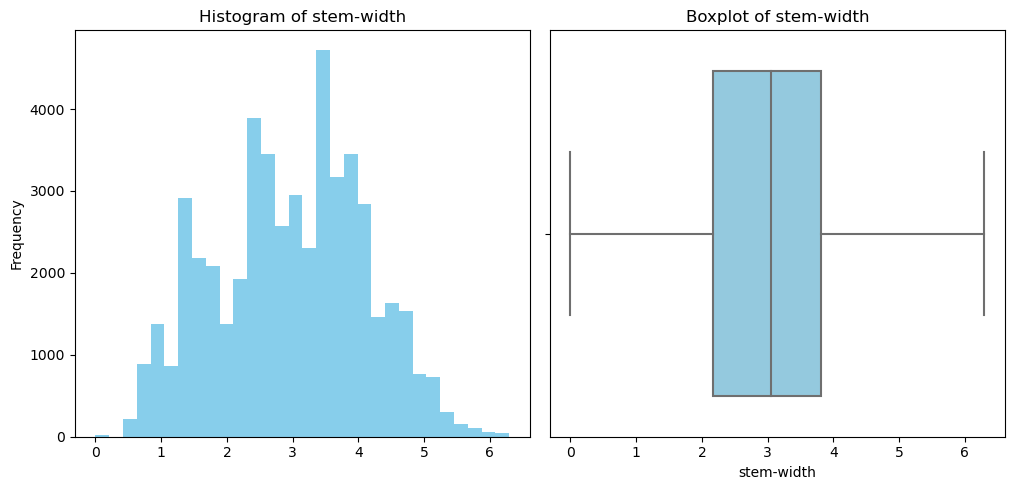

In [350]:
plot_detect_outliers (numerical_columns)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C3.Feature Engineering (optional)</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem">Handling Less Frequent Categories</p>

In [351]:
cat_feats = X.select_dtypes(include=['object','category'])
cat_feats.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-surface',
       'stem-color', 'has-ring', 'ring-type', 'habitat', 'season'],
      dtype='object')

In [352]:
cat_feat2 = test.select_dtypes(include=['object','category'])
cat_feat2.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-surface',
       'stem-color', 'has-ring', 'ring-type', 'habitat', 'season'],
      dtype='object')

In [353]:
def cleaning(df):
    threshold = 101
#     cat_feat = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
#        'gill-attachment', 'gill-spacing', 'gill-color', 'stem-surface',
#        'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']
    
    for i in cat_feats:
#         if df[i].dtype.name == 'category':
#             if 'missing' not in df[i].cat.categories:
#                 df[i] = df[i].cat.add_categories('missing')
#             if 'noise' not in df[i].cat.categories:
#                 df[i] = df[i].cat.add_categories('noise')
#         else:
#             df[i] = df[i].astype('category')
#             df[i] = df[i].cat.add_categories(['missing', 'noise'])

        df[i] = df[i].astype('category')
        df[i] = df[i].cat.add_categories(['missing', 'noise'])        
#         df[i] = df[i].fillna('missing')
        df[i] = df[i].fillna(df[i].mode()[0])  

        count = df[i].value_counts(dropna=False)
        less_freq = count[count < threshold].index
        
        df[i] = df[i].apply(lambda x: 'noise' if x in less_freq else x)
    
    return df


X = cleaning(X)
test = cleaning(test)

In [354]:
for i in cat_feats:
    X[i]=X[i].astype('category')
for i in cat_feats:
    test[i]=test[i].astype('category')

In [355]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 16 columns):
 #   Column                Dtype   
---  ------                -----   
 0   cap-diameter          float64 
 1   cap-shape             category
 2   cap-surface           category
 3   cap-color             category
 4   does-bruise-or-bleed  category
 5   gill-attachment       category
 6   gill-spacing          category
 7   gill-color            category
 8   stem-height           float32 
 9   stem-width            float64 
 10  stem-surface          category
 11  stem-color            category
 12  has-ring              category
 13  ring-type             category
 14  habitat               category
 15  season                category
dtypes: category(13), float32(1), float64(2)
memory usage: 65.4 MB


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C5.Get Dummies</p>

In [199]:
X.shape

(100000, 16)

In [200]:
test.shape

(2077964, 16)

In [201]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 2889278 to 1357108
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   cap-diameter          100000 non-null  float32 
 1   cap-shape             100000 non-null  category
 2   cap-surface           100000 non-null  category
 3   cap-color             100000 non-null  category
 4   does-bruise-or-bleed  100000 non-null  category
 5   gill-attachment       100000 non-null  category
 6   gill-spacing          100000 non-null  category
 7   gill-color            100000 non-null  category
 8   stem-height           100000 non-null  float64 
 9   stem-width            100000 non-null  float64 
 10  stem-surface          100000 non-null  category
 11  stem-color            100000 non-null  category
 12  has-ring              100000 non-null  category
 13  ring-type             100000 non-null  category
 14  habitat               100000 non-n

In [202]:
num_cols = X.select_dtypes('bool').columns
num_cols

Index([], dtype='object')

In [203]:
# categorical columns with parameters less than 11
categorical_cols = [cname for cname in X.columns if  
                        X[cname].dtype in ['object','category'] and X[cname].nunique() <11]
categorical_cols

['cap-shape',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'stem-surface',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [204]:
categorical_cols2 = [cname for cname in test.columns if  
                        test[cname].dtype in ['object','category'] and test[cname].nunique() <11]
categorical_cols2

['cap-shape',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'stem-surface',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [205]:
num_cols = [cname for cname in X.columns if  
                        X[cname].dtype in ['float64'] and X[cname].nunique() <3]
num_cols

[]

In [206]:
# inny zapis tego co wyżej
def converting_to_dummies (df):
    categorical_cols = [cname for cname in df.columns if  
                        df[cname].dtype in ['object','category'] and df[cname].nunique() <11]

    df = pd.get_dummies(df, columns=categorical_cols)
    return df
X = converting_to_dummies(X)
test = converting_to_dummies(test)

In [207]:
X.head(3)

cap-diameter cap-surface cap-color gill-color  stem-height  \
2889278      2.362174           t         n          p     1.706327   
346931       2.227502           s         n          w     1.639152   
234545       2.195381           y         w          n     1.790669   

         stem-width stem-color  cap-shape_b  cap-shape_c  cap-shape_f  \
2889278    4.229218          u        False        False        False   
346931     3.073696          w        False        False         True   
234545     3.600008          w        False        False        False   

         cap-shape_noise  cap-shape_o  cap-shape_p  cap-shape_s  cap-shape_x  \
2889278            False        False        False         True        False   
346931             False        False        False        False        False   
234545             False        False         True        False        False   

         does-bruise-or-bleed_f  does-bruise-or-bleed_noise  \
2889278                    True                       False   
346931                     True                       False   
234545                    False                       False   

         does-bruise-or-bleed_t  gill-attachment_a  gill-attachment_d  \
2889278                   False              False              False   
346931                    False              False              False   
234545                     True               True              False   

         gill-attachment_e  gill-attachment_f  gill-attachment_noise  \
2889278              False              False                  False   
346931               False              False                  False   
234545               False              False                  False   

         gill-attachment_p  gill-attachment_s  gill-attachment_x  \
2889278              False               True              False   
346931               False               True              False   
234545               False              False              False   

         gill-spacing_c  gill-spacing_d  gill-spacing_f  gill-spacing_noise  \
2889278            True           False           False               False   
346931             True           False           False               False   
234545             True           False           False               False   

         stem-surface_g  stem-surface_h  stem-surface_i  stem-surface_k  \
2889278           False           False           False           False   
346931            False           False            True           False   
234545            False           False           False           False   

         stem-surface_noise  stem-surface_s  stem-surface_t  stem-surface_y  \
2889278               False            True           False           False   
346931                False           False           False           False   
234545                False            True           False           False   

         has-ring_f  has-ring_noise  has-ring_t  ring-type_e  ring-type_f  \
2889278        True           False       False        False         True   
346931         True           False       False        False         True   
234545        False           False        True        False        False   

         ring-type_g  ring-type_l  ring-type_m  ring-type_noise  ring-type_p  \
2889278        False        False        False            False        False   
346931         False        False        False            False        False   
234545         False         True        False            False        False   

         ring-type_r  ring-type_z  habitat_d  habitat_g  habitat_h  habitat_l  \
2889278        False        False      False       True      False      False   
346931         False        False      False       True      False      False   
234545         False        False      False       True      False      False   

         habitat_m  habitat_noise  habitat_p  habitat_u  habitat_w  season_a  \
2889278      False          Fals

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C6.Encoding Categorical</p>

In [356]:
categorical_columns = X.select_dtypes(include=['category', 'object']).columns
categorical_columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-surface',
       'stem-color', 'has-ring', 'ring-type', 'habitat', 'season'],
      dtype='object')

In [357]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X[categorical_columns] = encoder.fit_transform(X[categorical_columns].astype(str))
test[categorical_columns] = encoder.fit_transform(test[categorical_columns].astype(str))

In [358]:
X.shape

(50000, 16)

In [359]:
test.shape

(2077964, 16)

In [360]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 2617607 to 1628254
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          50000 non-null  float32
 1   cap-shape             50000 non-null  float64
 2   cap-surface           50000 non-null  float64
 3   cap-color             50000 non-null  float64
 4   does-bruise-or-bleed  50000 non-null  float64
 5   gill-attachment       50000 non-null  float64
 6   gill-spacing          50000 non-null  float64
 7   gill-color            50000 non-null  float64
 8   stem-height           50000 non-null  float64
 9   stem-width            50000 non-null  float64
 10  stem-surface          50000 non-null  float64
 11  stem-color            50000 non-null  float64
 12  has-ring              50000 non-null  float64
 13  ring-type             50000 non-null  float64
 14  habitat               50000 non-null  float64
 15  season          

In [361]:
X = convert_types(X)
test = convert_types(test)

In [362]:
X.head()

cap-diameter  cap-shape  cap-surface  cap-color  \
2617607      2.505788        7.0          3.0        5.0   
2822458      1.393685        7.0          2.0        5.0   
1209595      2.335925        7.0         11.0       12.0   
357027       1.908929        7.0          3.0        5.0   
60707        2.952089        2.0          2.0        1.0   

         does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
2617607                   2.0              5.0           0.0        12.0   
2822458                   0.0              0.0           0.0        11.0   
1209595                   0.0              0.0           0.0         5.0   
357027                    0.0              7.0           0.0        11.0   
60707                     0.0              2.0           0.0        11.0   

         stem-height  stem-width  stem-surface  stem-color  has-ring  \
2617607     1.892138    4.424680           5.0         5.0       0.0   
2822458     1.782418    1.485229           5.0        11.0       0.0   
1209595     1.998269    3.181520           7.0         5.0       2.0   
357027      1.569245    2.373529           7.0         5.0       2.0   
60707       2.213269    4.029981           7.0        11.0       2.0   

         ring-type  habitat  season  
2617607        1.0      0.0     0.0  
2822458        1.0      0.0     0.0  
1209595        1.0      0.0     2.0  
357027         6.0      0.0     3.0  
60707          2.0      0.0     2.0

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C6.Normalizing - Scaling Data (optional)</p>

In [363]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [364]:
X.columns

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-surface', 'stem-color', 'has-ring',
       'ring-type', 'habitat', 'season'],
      dtype='object')

In [365]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

In [366]:
test.head(3)

cap-diameter  cap-shape  cap-surface  cap-color  does-bruise-or-bleed  \
0      0.553491   1.000000     0.818182   0.416667                   1.0   
1      0.442024   0.571429     0.818182   0.583333                   0.0   
2      0.128123   0.000000     0.181818   0.416667                   0.0   

   gill-attachment  gill-spacing  gill-color  stem-height  stem-width  \
0              0.0           0.0    0.916667     0.964416    0.541858   
1              0.0           0.0    1.000000     0.064781    0.340244   
2              0.0           0.0    0.416667     0.512774    0.099383   

   stem-surface  stem-color  has-ring  ring-type  habitat    season  
0          0.75    0.923077       1.0      0.250      0.0  0.000000  
1          0.75    0.461538       0.0      0.125      0.0  0.000000  
2          0.75    0.461538       0.0      0.125      0.0  0.333333

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C7.Feature Selections</p>

In [245]:
from sklearn.feature_selection import mutual_info_classif

In [246]:
discrete_features = X.dtypes == int


def mi_score_maker(X, y, discrete_features):
    scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features': X.columns,
        'Scores': scores
    })
    df = df.sort_values(['Scores'], ascending=False).reset_index(drop=True)
    return df

In [247]:
mi_scores = mi_score_maker(X, y, discrete_features)
mi_scores

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(16, 10))
sns.barplot(x="Scores", y="Features", data=mi_scores)
plt.title("Mutual Information Score", size=20)
plt.show()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C8.Delete unnecessary columns</p>

In [ ]:
# X = X.drop(["PassengerId", "Ticket"], axis=1).copy()
# test = test.drop(["PassengerId", "Ticket"], axis=1).copy()

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">II.MODEL ENGINEERING</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [367]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.Model Training</p>

In [368]:
# splitting the training dataframe into x(features) and y (target)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A1.Model 1</p>

In [262]:
# Define a deeper model with more nodes and Dropout
model_1 = Sequential([
    Dense(4096, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(2048, activation='relu'),
    Dropout(0.1),
    Dense(1024, activation='relu'),
    Dropout(0.1),
    Dense(512, activation='relu'),
    Dropout(0.1),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">Model 1 Evaluation</p>

In [288]:
# Compile model
little_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_1.compile(loss='binary_crossentropy', 
              optimizer=little_adam, 
              metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=25, min_lr=1e-6)

# Train model with early stopping
history = model_1.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9855 - loss: 0.0390 - val_accuracy: 0.9700 - val_loss: 0.1852 - learning_rate: 0.0010
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9858 - loss: 0.0394 - val_accuracy: 0.9704 - val_loss: 0.1911 - learning_rate: 0.0010
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9881 - loss: 0.0406 - val_accuracy: 0.9692 - val_loss: 0.2377 - learning_rate: 0.0010
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9821 - loss: 0.0487 - val_accuracy: 0.9632 - val_loss: 0.1760 - learning_rate: 0.0010
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9836 - loss: 0.0438 - val_accuracy: 0.9728 - val_loss: 0.2605 - learning_rate: 0.0010
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9882 - loss: 0.0321 - val_accuracy: 0.9668 - val_loss: 0.2713 - learning_rate: 0.0010
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9894 - loss: 0.0300 - val_acc

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A2.Model 2</p>

In [294]:
# Define a deeper model with more nodes and Dropout
model_2 = Sequential([
    Dense(4096, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(2048, activation='relu'),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

In [295]:
# Compile model
little_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_2.compile(loss='binary_crossentropy', 
              optimizer=little_adam, 
              metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=25, min_lr=1e-6)

# Train model with early stopping
history_21 = model_2.fit(X_train, y_train,
                    epochs=150,
                    batch_size=128,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.5355 - loss: 0.6908 - val_accuracy: 0.5320 - val_loss: 0.6511 - learning_rate: 0.0010
Epoch 2/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5839 - loss: 0.6060 - val_accuracy: 0.7420 - val_loss: 0.5682 - learning_rate: 0.0010
Epoch 3/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.7655 - loss: 0.5311 - val_accuracy: 0.7920 - val_loss: 0.4971 - learning_rate: 0.0010
Epoch 4/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.7909 - loss: 0.4879 - val_accuracy: 0.7748 - val_loss: 0.4971 - learning_rate: 0.0010
Epoch 5/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.7895 - loss: 0.4824 - val_accuracy: 0.8288 - val_loss: 0.4461 - learning_rate: 0.0010
Epoch 6/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.8244 - loss: 0.4369 - val_accuracy: 0.8388 - val_loss: 0.4482 - learning_rate: 0.0010
Epoch 7/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.8403 - loss: 0.4137 - 

Epoch 45/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9791 - loss: 0.0688 - val_accuracy: 0.9728 - val_loss: 0.1624 - learning_rate: 0.0010
Epoch 46/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9770 - loss: 0.0634 - val_accuracy: 0.9688 - val_loss: 0.1818 - learning_rate: 0.0010
Epoch 47/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9759 - loss: 0.0633 - val_accuracy: 0.9708 - val_loss: 0.1844 - learning_rate: 0.0010
Epoch 48/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9796 - loss: 0.0575 - val_accuracy: 0.9584 - val_loss: 0.1742 - learning_rate: 0.0010
Epoch 49/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9763 - loss: 0.0689 - val_accuracy: 0.9688 - val_loss: 0.1697 - learning_rate: 0.0010
Epoch 50/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9803 - loss: 0.0650 - val_accuracy: 0.9708 - val_loss: 0.1766 - learning_rate: 0.0010
Epoch 51/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9801 - loss: 0.

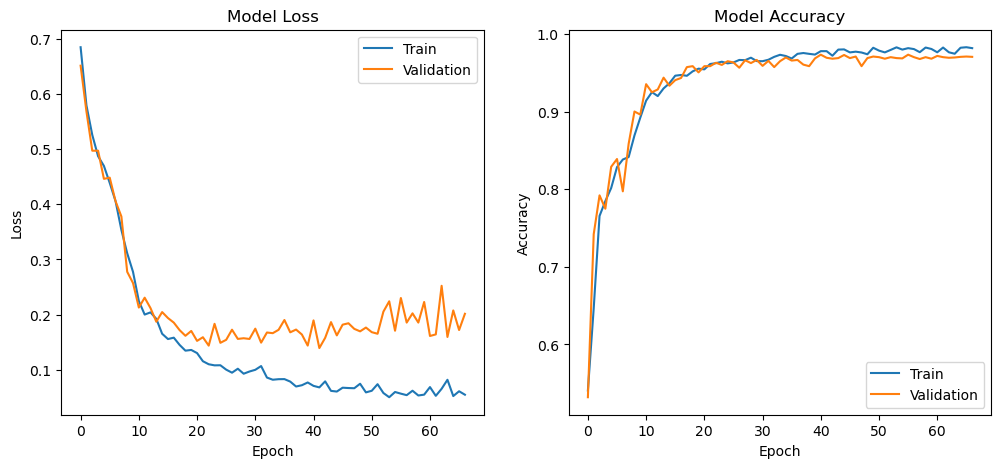

In [296]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_21.history['loss'])
plt.plot(history_21.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_21.history['accuracy'])
plt.plot(history_21.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A3.Model 3</p>

In [297]:
# Define a deeper model with more nodes and Dropout
model_3 = Sequential([
    Dense(2048, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

In [298]:
# Compile model
little_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_3.compile(loss='binary_crossentropy', 
              optimizer=little_adam, 
              metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=25, min_lr=1e-6)

# Train model with early stopping
history_31 = model_3.fit(X_train, y_train,
                    epochs=150,
                    batch_size=128,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5361 - loss: 0.6928 - val_accuracy: 0.5320 - val_loss: 0.6921 - learning_rate: 0.0010
Epoch 2/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5304 - loss: 0.6921 - val_accuracy: 0.5320 - val_loss: 0.6915 - learning_rate: 0.0010
Epoch 3/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5547 - loss: 0.6880 - val_accuracy: 0.5320 - val_loss: 0.6406 - learning_rate: 0.0010
Epoch 4/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5423 - loss: 0.6421 - val_accuracy: 0.5320 - val_loss: 0.5711 - learning_rate: 0.0010
Epoch 5/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5707 - loss: 0.5663 - val_accuracy: 0.7656 - val_loss: 0.5182 - learning_rate: 0.0010
Epoch 6/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7416 - loss: 0.5358 - val_accuracy: 0.7952 - val_loss: 0.4964 - learning_rate: 0.0010
Epoch 7/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7851 - loss: 0.4945 - 

Epoch 45/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9458 - loss: 0.1743 - val_accuracy: 0.9504 - val_loss: 0.1870 - learning_rate: 0.0010
Epoch 46/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9476 - loss: 0.1795 - val_accuracy: 0.9440 - val_loss: 0.1981 - learning_rate: 0.0010
Epoch 47/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9509 - loss: 0.1731 - val_accuracy: 0.9476 - val_loss: 0.1835 - learning_rate: 0.0010
Epoch 48/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9528 - loss: 0.1657 - val_accuracy: 0.9592 - val_loss: 0.1660 - learning_rate: 0.0010
Epoch 49/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9599 - loss: 0.1445 - val_accuracy: 0.9580 - val_loss: 0.1673 - learning_rate: 0.0010
Epoch 50/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9555 - loss: 0.1547 - val_accuracy: 0.9600 - val_loss: 0.1598 - learning_rate: 0.0010
Epoch 51/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9661 - loss: 0.

Epoch 89/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9735 - loss: 0.0901 - val_accuracy: 0.9672 - val_loss: 0.1174 - learning_rate: 0.0010
Epoch 90/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9778 - loss: 0.0808 - val_accuracy: 0.9696 - val_loss: 0.1206 - learning_rate: 0.0010
Epoch 91/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9774 - loss: 0.0817 - val_accuracy: 0.9720 - val_loss: 0.1212 - learning_rate: 0.0010
Epoch 92/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9772 - loss: 0.0788 - val_accuracy: 0.9732 - val_loss: 0.1144 - learning_rate: 0.0010
Epoch 93/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9806 - loss: 0.0699 - val_accuracy: 0.9636 - val_loss: 0.1302 - learning_rate: 0.0010
Epoch 94/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9753 - loss: 0.0842 - val_accuracy: 0.9756 - val_loss: 0.1262 - learning_rate: 0.0010
Epoch 95/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9800 - loss: 0.

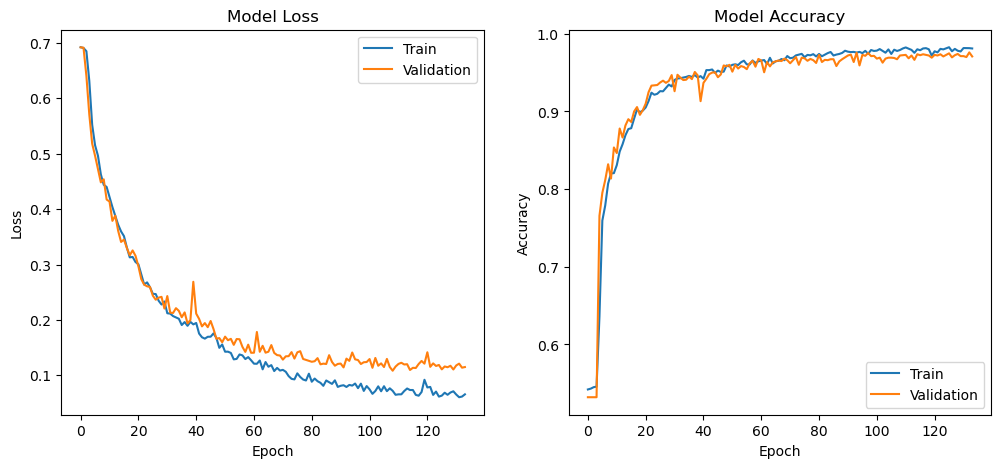

In [299]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_31.history['loss'])
plt.plot(history_31.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_31.history['accuracy'])
plt.plot(history_31.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [300]:
history_31.history['accuracy']

[0.5419999957084656,
 0.543066680431366,
 0.5449333190917969,
 0.5455999970436096,
 0.6357333064079285,
 0.7594666481018066,
 0.7789333462715149,
 0.8070666790008545,
 0.8201333284378052,
 0.8205333352088928,
 0.8307999968528748,
 0.8482666611671448,
 0.8577333092689514,
 0.8693333268165588,
 0.8773333430290222,
 0.8784000277519226,
 0.8907999992370605,
 0.9025333523750305,
 0.8989333510398865,
 0.9010666608810425,
 0.9050666689872742,
 0.9133333563804626,
 0.9241333603858948,
 0.9214666485786438,
 0.9226666688919067,
 0.9261333346366882,
 0.9258666634559631,
 0.9302666783332825,
 0.9345333576202393,
 0.9321333169937134,
 0.9405333399772644,
 0.9423999786376953,
 0.942799985408783,
 0.9435999989509583,
 0.9444000124931335,
 0.9457333087921143,
 0.9444000124931335,
 0.9467999935150146,
 0.9435999989509583,
 0.9454666376113892,
 0.9421333074569702,
 0.9531999826431274,
 0.9531999826431274,
 0.9539999961853027,
 0.9495999813079834,
 0.9525333046913147,
 0.9508000016212463,
 0.951200008392

In [301]:
history_31.history['val_accuracy']

[0.5320000052452087,
 0.5320000052452087,
 0.5320000052452087,
 0.5320000052452087,
 0.7656000256538391,
 0.795199990272522,
 0.8116000294685364,
 0.8320000171661377,
 0.8136000037193298,
 0.853600025177002,
 0.8464000225067139,
 0.878000020980835,
 0.8664000034332275,
 0.8820000290870667,
 0.8899999856948853,
 0.8863999843597412,
 0.8999999761581421,
 0.9056000113487244,
 0.8956000208854675,
 0.9016000032424927,
 0.9100000262260437,
 0.9247999787330627,
 0.9332000017166138,
 0.9336000084877014,
 0.9340000152587891,
 0.9372000098228455,
 0.9395999908447266,
 0.9368000030517578,
 0.9391999840736389,
 0.9467999935150146,
 0.9259999990463257,
 0.9472000002861023,
 0.9435999989509583,
 0.9404000043869019,
 0.9408000111579895,
 0.9448000192642212,
 0.9416000247001648,
 0.9508000016212463,
 0.946399986743927,
 0.9132000207901001,
 0.9368000030517578,
 0.9419999718666077,
 0.9480000138282776,
 0.949999988079071,
 0.9503999948501587,
 0.9440000057220459,
 0.9476000070571899,
 0.959200024604797

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A4.Model 4</p>

In [369]:
# Define a deeper model with more nodes and Dropout
model_4 = Sequential([
    Dense(2048, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

In [370]:
# Compile model
little_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_4.compile(loss='binary_crossentropy', 
              optimizer=little_adam, 
              metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=25, min_lr=1e-6)

# Train model with early stopping
history_41 = model_4.fit(X_train, y_train,
                    epochs=150,
                    batch_size=128,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5794 - loss: 0.6616 - val_accuracy: 0.7933 - val_loss: 0.4884 - learning_rate: 0.0010
Epoch 2/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7982 - loss: 0.4746 - val_accuracy: 0.8481 - val_loss: 0.4002 - learning_rate: 0.0010
Epoch 3/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8407 - loss: 0.4047 - val_accuracy: 0.8933 - val_loss: 0.3403 - learning_rate: 0.0010
Epoch 4/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8767 - loss: 0.3469 - val_accuracy: 0.9064 - val_loss: 0.3112 - learning_rate: 0.0010
Epoch 5/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8909 - loss: 0.3177 - val_accuracy: 0.9145 - val_loss: 0.2865 - learning_rate: 0.0010
Epoch 6/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8981 - loss: 0.2928 - val_accuracy: 0.9186 - val_loss: 0.2679 - learning_rate: 0.0010
Epoch 7/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9102 - l

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9713 - loss: 0.0966 - val_accuracy: 0.9813 - val_loss: 0.0755 - learning_rate: 0.0010
Epoch 88/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9749 - loss: 0.0843 - val_accuracy: 0.9795 - val_loss: 0.0910 - learning_rate: 0.0010
Epoch 89/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9723 - loss: 0.0956 - val_accuracy: 0.9784 - val_loss: 0.0818 - learning_rate: 0.0010
Epoch 90/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9719 - loss: 0.0922 - val_accuracy: 0.9780 - val_loss: 0.0841 - learning_rate: 0.0010
Epoch 91/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9738 - loss: 0.0898 - val_accuracy: 0.9790 - val_loss: 0.0830 - learning_rate: 0.0010
Epoch 92/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9696 - loss: 0.0994 - val_accuracy: 0.9791 - val_loss: 0.0832 - learning_rate: 0.0010
Epoch 93/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9725 - loss: 0

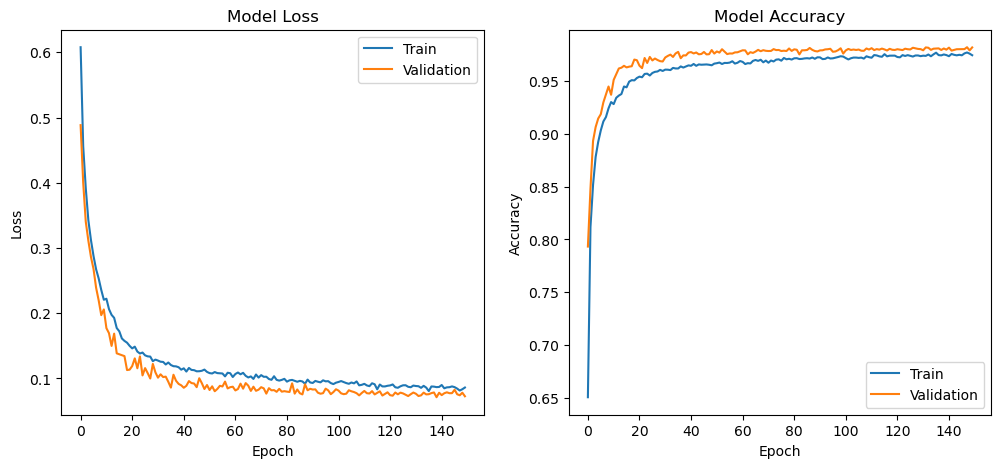

In [371]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_41.history['loss'])
plt.plot(history_41.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_41.history['accuracy'])
plt.plot(history_41.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [372]:
history_41.history['val_accuracy']

[0.7932999730110168,
 0.8481000065803528,
 0.8932999968528748,
 0.9064000248908997,
 0.9144999980926514,
 0.9186000227928162,
 0.9297999739646912,
 0.9373000264167786,
 0.9448000192642212,
 0.9369999766349792,
 0.9510999917984009,
 0.9563999772071838,
 0.961899995803833,
 0.9625999927520752,
 0.9643999934196472,
 0.9628999829292297,
 0.9635999798774719,
 0.9639999866485596,
 0.970300018787384,
 0.9696999788284302,
 0.9645000100135803,
 0.9621999859809875,
 0.9718000292778015,
 0.9671000242233276,
 0.9728000164031982,
 0.9695000052452087,
 0.9713000059127808,
 0.9699000120162964,
 0.9688000082969666,
 0.968500018119812,
 0.9722999930381775,
 0.973800003528595,
 0.9750000238418579,
 0.9728000164031982,
 0.9761000275611877,
 0.9775999784469604,
 0.9715999960899353,
 0.9743000268936157,
 0.9742000102996826,
 0.9768999814987183,
 0.977400004863739,
 0.9761000275611877,
 0.9769999980926514,
 0.9753000140190125,
 0.975600004196167,
 0.9775000214576721,
 0.9751999974250793,
 0.9753999710083008

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B.Model Evaluation</p>

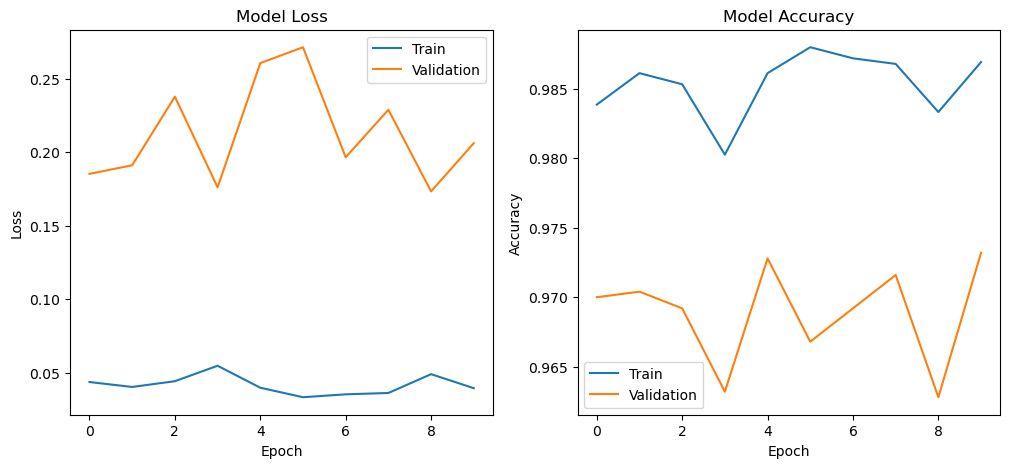

In [289]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [275]:
history.history['accuracy']

[0.9724000096321106,
 0.9673333168029785,
 0.9758666753768921,
 0.9721333384513855,
 0.974399983882904,
 0.9754666686058044,
 0.9677333235740662,
 0.9725333452224731,
 0.9747999906539917,
 0.9782666563987732]

In [276]:
history.history['val_accuracy']

[0.9652000069618225,
 0.9571999907493591,
 0.9607999920845032,
 0.9643999934196472,
 0.9679999947547913,
 0.9643999934196472,
 0.9635999798774719,
 0.9592000246047974,
 0.9648000001907349,
 0.9624000191688538]

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C.Model Tuning</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C1. epochs=20</p>

In [265]:
# Train model with early stopping
history_1 = model_1.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.8729 - loss: 0.3293 - val_accuracy: 0.8944 - val_loss: 0.2756 - learning_rate: 0.0010
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.8930 - loss: 0.2687 - val_accuracy: 0.8988 - val_loss: 0.3019 - learning_rate: 0.0010
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.8983 - loss: 0.2573 - val_accuracy: 0.9204 - val_loss: 0.2173 - learning_rate: 0.0010
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9002 - loss: 0.2369 - val_accuracy: 0.9244 - val_loss: 0.2057 - learning_rate: 0.0010
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9308 - loss: 0.1833 - val_accuracy: 0.9416 - val_loss: 0.1908 - learning_rate: 0.0010
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9397 - loss: 0.1573 - val_accuracy: 0.9380 - val_loss: 0.2120 - learning_rate: 0.0010
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9280 - loss: 0.1771 - val_acc

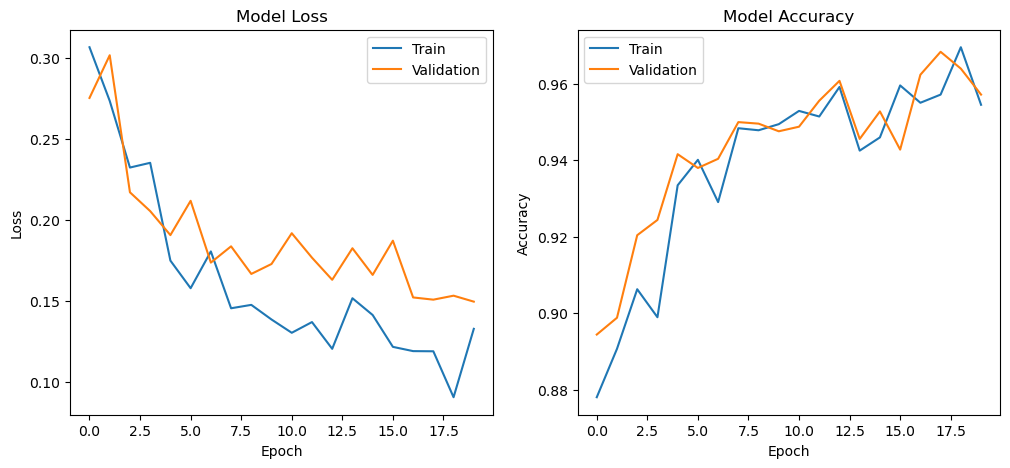

In [266]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [267]:
history_1.history['accuracy']

[0.878000020980835,
 0.890666663646698,
 0.9062666893005371,
 0.8989333510398865,
 0.9334666728973389,
 0.9401333332061768,
 0.9290666580200195,
 0.9484000205993652,
 0.947866678237915,
 0.9494666457176208,
 0.9529333114624023,
 0.9514666795730591,
 0.9592000246047974,
 0.9425333142280579,
 0.9459999799728394,
 0.9595999717712402,
 0.9550666809082031,
 0.9571999907493591,
 0.9696000218391418,
 0.9545333385467529]

In [268]:
history_1.history['val_accuracy']

[0.8944000005722046,
 0.8988000154495239,
 0.9204000234603882,
 0.9243999719619751,
 0.9416000247001648,
 0.9380000233650208,
 0.9404000043869019,
 0.949999988079071,
 0.9495999813079834,
 0.9476000070571899,
 0.9488000273704529,
 0.9556000232696533,
 0.9607999920845032,
 0.9455999732017517,
 0.9527999758720398,
 0.942799985408783,
 0.9624000191688538,
 0.9684000015258789,
 0.9639999866485596,
 0.9571999907493591]

In [ ]:
history_1.history['loss']

In [ ]:
history_1.history['val_loss']

In [ ]:
model_1.summary()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C2. epochs=150</p>

In [290]:
# Train model with early stopping
history_2 = model_1.fit(X_train, y_train,
                    epochs=150,
                    batch_size=128,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.9838 - loss: 0.0427 - val_accuracy: 0.9656 - val_loss: 0.2219 - learning_rate: 0.0010
Epoch 2/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.9871 - loss: 0.0337 - val_accuracy: 0.9704 - val_loss: 0.2522 - learning_rate: 0.0010
Epoch 3/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9882 - loss: 0.0424 - val_accuracy: 0.9576 - val_loss: 0.2475 - learning_rate: 0.0010
Epoch 4/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9827 - loss: 0.0426 - val_accuracy: 0.9716 - val_loss: 0.2396 - learning_rate: 0.0010
Epoch 5/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9876 - loss: 0.0384 - val_accuracy: 0.9692 - val_loss: 0.2245 - learning_rate: 0.0010
Epoch 6/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9866 - loss: 0.0410 - val_accuracy: 0.9644 - val_loss: 0.2067 - learning_rate: 0.0010
Epoch 7/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9855 - loss: 0.0416 - 

Epoch 45/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9917 - loss: 0.0210 - val_accuracy: 0.9692 - val_loss: 0.3162 - learning_rate: 0.0010
Epoch 46/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9914 - loss: 0.0225 - val_accuracy: 0.9728 - val_loss: 0.2511 - learning_rate: 0.0010
Epoch 47/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9921 - loss: 0.0197 - val_accuracy: 0.9708 - val_loss: 0.2574 - learning_rate: 0.0010
Epoch 48/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.9728 - val_loss: 0.1959 - learning_rate: 0.0010
Epoch 49/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9880 - loss: 0.0333 - val_accuracy: 0.9708 - val_loss: 0.2723 - learning_rate: 0.0010


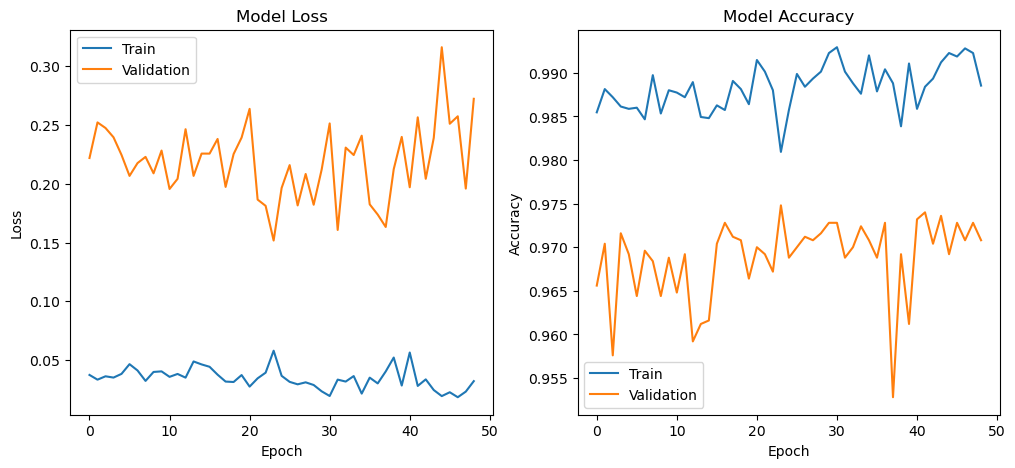

In [292]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [279]:
history_2.history['accuracy']

[0.9761333465576172,
 0.9781333208084106,
 0.9771999716758728,
 0.9711999893188477,
 0.9595999717712402,
 0.9522666931152344,
 0.9715999960899353,
 0.9761333465576172,
 0.9762666821479797,
 0.9786666631698608,
 0.9800000190734863,
 0.980400025844574,
 0.9838666915893555,
 0.9774666428565979,
 0.9658666849136353,
 0.9747999906539917,
 0.9800000190734863,
 0.9775999784469604,
 0.984666645526886,
 0.9806666374206543,
 0.984666645526886,
 0.9829333424568176,
 0.9851999878883362,
 0.9851999878883362,
 0.9758666753768921,
 0.981333315372467,
 0.9842666387557983,
 0.9800000190734863,
 0.9836000204086304,
 0.9833333492279053,
 0.9879999756813049,
 0.9854666590690613,
 0.9855999946594238,
 0.9814666509628296,
 0.9850666522979736,
 0.9842666387557983,
 0.98826664686203,
 0.9854666590690613,
 0.9779999852180481,
 0.979200005531311,
 0.9794666767120361,
 0.9857333302497864,
 0.9886666536331177,
 0.9821333289146423,
 0.9879999756813049,
 0.9872000217437744,
 0.986133337020874,
 0.9885333180427551,


In [293]:
history_2.history['val_accuracy']

[0.9656000137329102,
 0.9703999757766724,
 0.9575999975204468,
 0.9715999960899353,
 0.9692000150680542,
 0.9643999934196472,
 0.9696000218391418,
 0.9684000015258789,
 0.9643999934196472,
 0.9688000082969666,
 0.9648000001907349,
 0.9692000150680542,
 0.9592000246047974,
 0.9611999988555908,
 0.9616000056266785,
 0.9703999757766724,
 0.9728000164031982,
 0.9711999893188477,
 0.97079998254776,
 0.9664000272750854,
 0.9700000286102295,
 0.9692000150680542,
 0.967199981212616,
 0.9747999906539917,
 0.9688000082969666,
 0.9700000286102295,
 0.9711999893188477,
 0.97079998254776,
 0.9715999960899353,
 0.9728000164031982,
 0.9728000164031982,
 0.9688000082969666,
 0.9700000286102295,
 0.9724000096321106,
 0.97079998254776,
 0.9688000082969666,
 0.9728000164031982,
 0.9527999758720398,
 0.9692000150680542,
 0.9611999988555908,
 0.9732000231742859,
 0.9739999771118164,
 0.9703999757766724,
 0.9735999703407288,
 0.9692000150680542,
 0.9728000164031982,
 0.97079998254776,
 0.9728000164031982,
 

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C2. epochs=100</p>

In [281]:
# Train model with early stopping
history_3 = model_1.fit(X_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9841 - loss: 0.0540 - val_accuracy: 0.9708 - val_loss: 0.1854 - learning_rate: 0.0010
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9864 - loss: 0.0385 - val_accuracy: 0.9660 - val_loss: 0.1682 - learning_rate: 0.0010
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9791 - loss: 0.0596 - val_accuracy: 0.9532 - val_loss: 0.1767 - learning_rate: 0.0010
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9769 - loss: 0.0648 - val_accuracy: 0.9632 - val_loss: 0.1766 - learning_rate: 0.0010
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.9728 - loss: 0.0684 - val_accuracy: 0.9672 - val_loss: 0.2120 - learning_rate: 0.0010
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9837 - loss: 0.0448 - val_accuracy: 0.9708 - val_loss: 0.1873 - learning_rate: 0.0010
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9869 - loss: 0.0369 - 

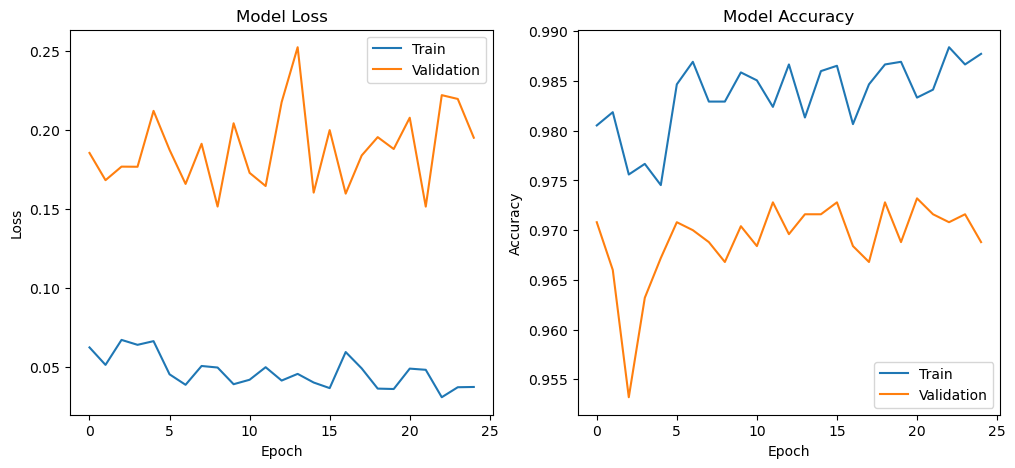

In [282]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [283]:
history_2.history['accuracy']

[0.9761333465576172,
 0.9781333208084106,
 0.9771999716758728,
 0.9711999893188477,
 0.9595999717712402,
 0.9522666931152344,
 0.9715999960899353,
 0.9761333465576172,
 0.9762666821479797,
 0.9786666631698608,
 0.9800000190734863,
 0.980400025844574,
 0.9838666915893555,
 0.9774666428565979,
 0.9658666849136353,
 0.9747999906539917,
 0.9800000190734863,
 0.9775999784469604,
 0.984666645526886,
 0.9806666374206543,
 0.984666645526886,
 0.9829333424568176,
 0.9851999878883362,
 0.9851999878883362,
 0.9758666753768921,
 0.981333315372467,
 0.9842666387557983,
 0.9800000190734863,
 0.9836000204086304,
 0.9833333492279053,
 0.9879999756813049,
 0.9854666590690613,
 0.9855999946594238,
 0.9814666509628296,
 0.9850666522979736,
 0.9842666387557983,
 0.98826664686203,
 0.9854666590690613,
 0.9779999852180481,
 0.979200005531311,
 0.9794666767120361,
 0.9857333302497864,
 0.9886666536331177,
 0.9821333289146423,
 0.9879999756813049,
 0.9872000217437744,
 0.986133337020874,
 0.9885333180427551,


In [284]:
history_2.history['val_accuracy']

[0.9639999866485596,
 0.9679999947547913,
 0.9607999920845032,
 0.9639999866485596,
 0.9567999839782715,
 0.9639999866485596,
 0.9599999785423279,
 0.9643999934196472,
 0.9595999717712402,
 0.9643999934196472,
 0.9679999947547913,
 0.9711999893188477,
 0.9684000015258789,
 0.9620000123977661,
 0.9620000123977661,
 0.9535999894142151,
 0.9703999757766724,
 0.9688000082969666,
 0.9675999879837036,
 0.9656000137329102,
 0.9688000082969666,
 0.9679999947547913,
 0.9715999960899353,
 0.9592000246047974,
 0.9607999920845032,
 0.9599999785423279,
 0.9567999839782715,
 0.9684000015258789,
 0.9679999947547913,
 0.9700000286102295,
 0.9724000096321106,
 0.967199981212616,
 0.9679999947547913,
 0.9703999757766724,
 0.9700000286102295,
 0.97079998254776,
 0.9728000164031982,
 0.9703999757766724,
 0.967199981212616,
 0.9667999744415283,
 0.9656000137329102,
 0.9724000096321106,
 0.9595999717712402,
 0.9703999757766724,
 0.9703999757766724,
 0.9700000286102295,
 0.9700000286102295,
 0.97000002861022

In [ ]:
model.save('mushroom_classification_model_ver-7.h5')

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem">Saving Submission file</p> 

In [ ]:
model =load_model('mushroom_classification_model_ver-7.h5')

In [ ]:
test_predictions = (model_1.predict(dt) > 0.5).astype(int).flatten()
ds['class'] = np.where(test_predictions == 1, 'p', 'e')
# Save the updated submission file
ds.to_csv('submission.csv', index=False)

x=pd.read_csv('submission.csv')
print("submission file created")
x.to_csv('submission_01.csv', index=False)
xr=pd.read_csv('submission_01.csv')
xr.head()

# <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">III.MODEL DEPLOYMENT</p>

In [ ]:
# RFR = RFR.fit(X, y)
# predictions_RFR = RFR.predict(X_test)

submission_RFR = pd.DataFrame({
    'id': test_ids,
    'class': predictions_RFR
})
submission_RFR['class'] = submission_RFR['class'].apply(lambda x:'e' if x<=0.5 else 'p')
# submission_RFR.to_csv('submission_RFR_001.csv', index=False)
submission_RFR.to_parquet('parquet_RFR_004.parquet', index=False)